In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import math
lam = 632e-9

## 220目

M: 3.1870157e-05 m: -4.9095615e-07
range: 3.2361113e-05


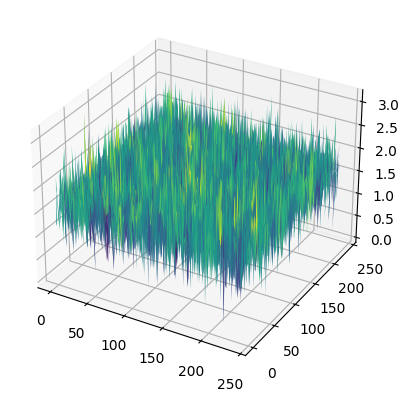

In [70]:
miu=16 * 10 ** -6
sigma0=4 * 10 ** -6

diffuser = torch.FloatTensor(torch.normal(miu, sigma0,size=(240,240))).numpy()

x = np.arange(0,240)
y = np.arange(0,240)
X, Y = np.meshgrid(x, y)

ax = plt.axes(projection='3d')


ax.plot_surface(X, Y, diffuser,cmap='viridis', edgecolor='none')
print('M:',diffuser.max(),'m:',diffuser.min())
print('range:',diffuser.max()-diffuser.min())





### 核

/var/folders/70/f68hms5512gffmdv178wlrvc0000gn/T/ipykernel_49506/2418768017.py:28: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  size = torch.tensor((torch.sqrt(2 * torch.log(torch.tensor(2).clone().detach())) * sigma) / lam,dtype=torch.int16) * 2 + 1


M: tensor(8.1093e-05) m: tensor(0.)


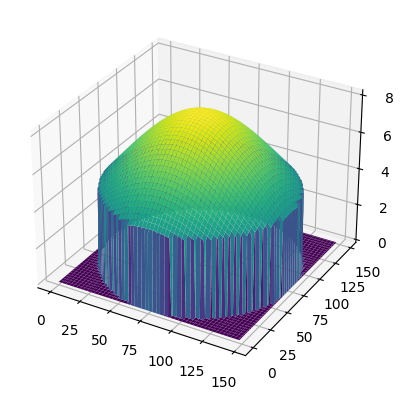

In [71]:
sigma = 40 * 10 ** -6

def gaussian_2d_kernel(kernel_size, Sigma):
        kernel = torch.zeros([kernel_size, kernel_size])
        center = torch.div(kernel_size, 2, rounding_mode='floor')

        x = torch.linspace(torch.div(-kernel_size, 2, rounding_mode='floor'), torch.div(kernel_size, 2, rounding_mode='floor'), kernel_size)
        y = torch.linspace(torch.div(-kernel_size, 2, rounding_mode='floor'), torch.div(kernel_size, 2, rounding_mode='floor'), kernel_size)
        mask_x, mask_y = torch.meshgrid(x, y, indexing='xy')
        mask_rho = torch.hypot(mask_x, mask_y)
        mask = (mask_rho < center)

        if Sigma == 0:
            sigma = ((kernel_size - 1) * 0.5 - 1) * 0.3 + 0.8

        s = 2 * (Sigma ** 2)
        for i in range(0, kernel_size):
            for j in range(0, kernel_size):
                x = (i - center) * lam
                y = (j - center) * lam

                kernel[i, j] = torch.exp(torch.div(-(x ** 2 + y ** 2), s))

        kernel = kernel * mask
        kernel = kernel / torch.sum(kernel)

        return torch.FloatTensor(kernel)
size = torch.tensor((torch.sqrt(2 * torch.log(torch.tensor(2).clone().detach())) * sigma) / lam,dtype=torch.int16) * 2 + 1
kernel = gaussian_2d_kernel(size, sigma)


x = np.arange(0,int(size))
y = np.arange(0,int(size))
X, Y = np.meshgrid(x, y)

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, kernel,cmap='viridis', edgecolor='none')
print('M:',kernel.max(),'m:',kernel.min())







/var/folders/70/f68hms5512gffmdv178wlrvc0000gn/T/ipykernel_49506/1017900685.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  k = torch.tensor(kernel).unsqueeze(0).unsqueeze(0)


d torch.Size([1, 1, 240, 240])


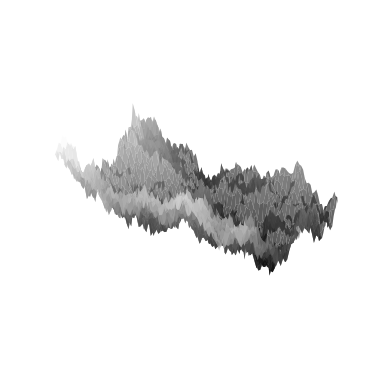

In [74]:
d = torch.tensor(diffuser).unsqueeze(0).unsqueeze(0)
k = torch.tensor(kernel).unsqueeze(0).unsqueeze(0)
print('d',d.size())
W_K = torch.conv2d(d, k, padding=0).squeeze(0).squeeze(0).numpy()

x = np.arange(0,W_K.shape[0])
y = np.arange(0,W_K.shape[1])
X, Y = np.meshgrid(x, y)

ax = plt.axes(projection='3d')
ax.axis('off')
ax.plot_surface(X, Y, W_K,cmap='gray', edgecolor='none', alpha = .75)
plt.savefig(r'/Users/hzh/Desktop/2.png',transparent = True,dpi=300)

## 600目

M: 3.759552e-05 m: -4.050673e-06
range: 4.164619e-05


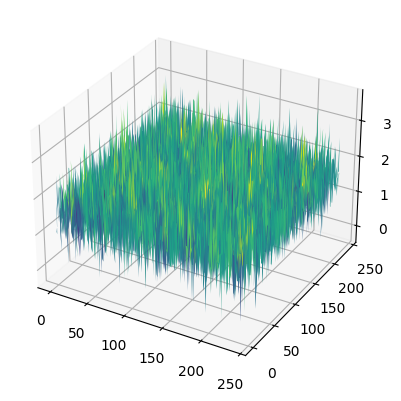

In [41]:
miu=16 * 10 ** -6
sigma0=5 * 10 ** -6

diffuser = torch.FloatTensor(torch.normal(miu, sigma0,size=(240,240))).numpy()

x = np.arange(0,240)
y = np.arange(0,240)
X, Y = np.meshgrid(x, y)

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, diffuser,cmap='viridis', edgecolor='none')
print('M:',diffuser.max(),'m:',diffuser.min())
print('range:',diffuser.max()-diffuser.min())

### 核

M: tensor(0.0096) m: tensor(0.)


/var/folders/70/f68hms5512gffmdv178wlrvc0000gn/T/ipykernel_98701/3471168948.py:28: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  size = torch.tensor((torch.sqrt(2 * torch.log(torch.tensor(2))) * sigma) / lam,dtype=torch.int16) * 2 + 1


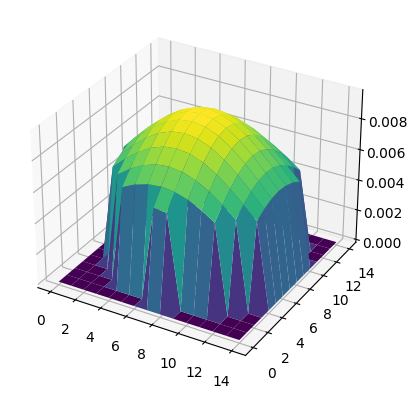

In [39]:
sigma = 4 * 10 ** -6

def gaussian_2d_kernel(kernel_size, Sigma):
        kernel = torch.zeros([kernel_size, kernel_size])
        center = torch.div(kernel_size, 2, rounding_mode='floor')

        x = torch.linspace(torch.div(-kernel_size, 2, rounding_mode='floor'), torch.div(kernel_size, 2, rounding_mode='floor'), kernel_size)
        y = torch.linspace(torch.div(-kernel_size, 2, rounding_mode='floor'), torch.div(kernel_size, 2, rounding_mode='floor'), kernel_size)
        mask_x, mask_y = torch.meshgrid(x, y, indexing='xy')
        mask_rho = torch.hypot(mask_x, mask_y)
        mask = (mask_rho < center)

        if Sigma == 0:
            sigma = ((kernel_size - 1) * 0.5 - 1) * 0.3 + 0.8

        s = 2 * (Sigma ** 2)
        for i in range(0, kernel_size):
            for j in range(0, kernel_size):
                x = (i - center) * lam
                y = (j - center) * lam

                kernel[i, j] = torch.exp(torch.div(-(x ** 2 + y ** 2), s))

        kernel = kernel * mask
        kernel = kernel / torch.sum(kernel)

        return torch.FloatTensor(kernel)
size = torch.tensor((torch.sqrt(2 * torch.log(torch.tensor(2))) * sigma) / lam,dtype=torch.int16) * 2 + 1
kernel = gaussian_2d_kernel(size, sigma)


x = np.arange(0,int(size))
y = np.arange(0,int(size))
X, Y = np.meshgrid(x, y)

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, kernel,cmap='viridis', edgecolor='none')
print('M:',kernel.max(),'m:',kernel.min())